<a href="https://colab.research.google.com/github/BharathiNGopalsamy/FIIP/blob/main/FIIP_inventory_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('inventory.xlsx')

In [ ]:
df

,Sale_ID,Date,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand
0,1,2017-01-01,24,4,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,$9.99,$12.99,6
1,2,2017-01-01,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Action Figure,Toys,$9.99,$15.99,27
2,3,2017-01-01,6,8,1,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,Deck Of Cards,Games,$3.99,$6.99,63
3,4,2017-01-01,48,7,1,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,Dart Gun,Sports & Outdoors,$11.99,$15.99,5
4,5,2017-01-01,44,18,1,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,Lego Bricks,Toys,$34.99,$39.99,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,24,19,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Magic Sand,Art & Crafts,$13.99,$15.99,25
829258,829259,2018-09-30,16,35,1,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19,Uno Card Game,Games,$3.99,$7.99,12
829259,829260,2018-09-30,22,19,1,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29,Magic Sand,Art & Crafts,$13.99,$15.99,25
829260,829261,2018-09-30,13,2,2,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30,Animal Figures,Toys,$9.99,$12.99,0


In [ ]:
df = df.drop(['Date','Store_Open_Date'],axis=1)


In [ ]:
df.dtypes

Sale_ID              int64
Store_ID             int64
Product_ID           int64
Units                int64
Store_Name          object
Store_City          object
Store_Location      object
Product_Name        object
Product_Category    object
Product_Cost        object
Product_Price       object
Stock_On_Hand        int64
dtype: object

In [ ]:
df['Store_Name'] = df.Store_Name.astype('category')
df['Store_City'] = df.Store_City.astype('category')
df['Store_Location'] = df.Store_Location.astype('category')
df['Product_Name'] = df.Product_Name.astype('category')
df['Product_Category'] = df.Product_Category.astype('category')
df[df.columns[9:11]] = df[df.columns[9:11]].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df

,Sale_ID,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand
0,1,24,4,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,Chutes & Ladders,Games,9.99,12.99,6
1,2,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,Action Figure,Toys,9.99,15.99,27
2,3,6,8,1,Maven Toys Mexicali 1,Mexicali,Commercial,Deck Of Cards,Games,3.99,6.99,63
3,4,48,7,1,Maven Toys Saltillo 2,Saltillo,Commercial,Dart Gun,Sports & Outdoors,11.99,15.99,5
4,5,44,18,1,Maven Toys Puebla 3,Puebla,Residential,Lego Bricks,Toys,34.99,39.99,11
...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,24,19,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,Magic Sand,Art & Crafts,13.99,15.99,25
829258,829259,16,35,1,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,Uno Card Game,Games,3.99,7.99,12
829259,829260,22,19,1,Maven Toys Guanajuato 2,Guanajuato,Commercial,Magic Sand,Art & Crafts,13.99,15.99,25
829260,829261,13,2,2,Maven Toys Mexicali 2,Mexicali,Downtown,Animal Figures,Toys,9.99,12.99,0


In [ ]:
df.dtypes

Sale_ID                int64
Store_ID               int64
Product_ID             int64
Units                  int64
Store_Name          category
Store_City          category
Store_Location      category
Product_Name        category
Product_Category    category
Product_Cost         float64
Product_Price        float64
Stock_On_Hand          int64
dtype: object

In [ ]:
for col_name in df.columns:
    if(df[col_name].dtype.name == 'category'):
    #df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
df.dtypes

Sale_ID               int64
Store_ID              int64
Product_ID            int64
Units                 int64
Store_Name             int8
Store_City             int8
Store_Location         int8
Product_Name           int8
Product_Category       int8
Product_Cost        float64
Product_Price       float64
Stock_On_Hand         int64
dtype: object

In [ ]:
df

,Sale_ID,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand
0,1,24,4,1,0,0,2,3,2,9.99,12.99,6
1,2,28,1,1,37,20,2,0,4,9.99,15.99,27
2,3,6,8,1,27,15,1,7,2,3.99,6.99,63
3,4,48,7,1,40,21,1,6,3,11.99,15.99,5
4,5,44,18,1,38,20,3,17,4,34.99,39.99,11
...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,24,19,1,0,0,2,18,0,13.99,15.99,25
829258,829259,16,35,1,41,22,2,34,2,3.99,7.99,12
829259,829260,22,19,1,20,11,1,18,0,13.99,15.99,25
829260,829261,13,2,2,28,15,2,1,4,9.99,12.99,0


In [ ]:
kmeans = KMeans(2)
kmeans.fit(df[['Units', 'Stock_On_Hand']])

KMeans(n_clusters=2)

In [ ]:
identified_labels = kmeans.fit_predict(df[['Units', 'Stock_On_Hand']])
identified_labels

array([0, 0, 1, ..., 0, 0, 1])

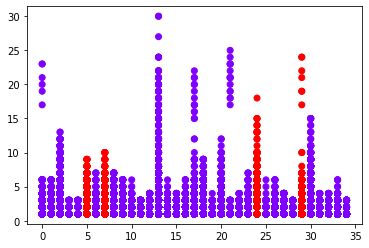

In [ ]:
df_with_clusters = df.copy()
df_with_clusters['Clusters'] = identified_labels 
plt.scatter(df_with_clusters['Product_Name'],df_with_clusters['Units'],c=df_with_clusters['Clusters'],cmap='rainbow')

In [ ]:
df_with_clusters.to_excel("output_RF.xlsx")

In [ ]:
X = df_with_clusters[['Units', 'Stock_On_Hand']].values
y = df_with_clusters[['Clusters']].values

In [ ]:
X,y

(array([[ 1,  6],
        [ 1, 27],
        [ 1, 63],
        ...,
        [ 1, 25],
        [ 2,  0],
        [ 1, 79]], dtype=int64),
 array([[0],
        [0],
        [1],
        ...,
        [0],
        [0],
        [1]]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50,max_features="auto",random_state=44)
rf_model.fit(X_train,y_train)

C:\Users\Bharathi\AppData\Local\Temp/ipykernel_3268/3541230381.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestClassifier(n_estimators=50, random_state=44)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
ac

1.0

In [ ]:
cm

array([[116744,      0],
       [     0,  49109]], dtype=int64)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
RF_Valmodel = RandomForestClassifier()

In [ ]:
scores = cross_val_score(RF_Valmodel, X_train, y_train, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)

In [ ]:
mean(absolute(scores))

0.0